#### Energy histograms for dataframes loaded in

this is exceptionally bespoke

In [1]:
import sys,os,os.path

sys.path.append("../../")   # cite IC from parent directory
                            # NOTE if you can't import IC stuff, its because of the
                            # above line
#sys.path.append(os.path.expanduser('~/code/eol_hsrl_python'))
os.environ['ICTDIR']='/home/e78368jw/Documents/NEXT_CODE/IC'

import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np
import tables as tb
import IC.invisible_cities.io.dst_io                           as     dstio
import IC.invisible_cities.io.mcinfo_io as mcio
from    IC.invisible_cities.core.core_functions   import shift_to_bin_centers

import scipy.special as special
from scipy.stats import skewnorm
from scipy.optimize import curve_fit

from scipy.integrate import quad

from Tl_studies.functions import isaura_analyse as isa

In [2]:
# read in data
directory = ''
#directory = '../analysis_data/10x10x10_cut_data/'

port_1a = pd.read_hdf(directory + 'P1A_10x10x10.h5')
port_1b = pd.read_hdf(directory + 'P1B_10x10x10.h5')
port_2a = pd.read_hdf(directory + 'P2A_10x10x10.h5')
port_2b = pd.read_hdf(directory + 'P2B_10x10x10.h5')

In [3]:
display(port_1a)

,event,trackID,energy,length,numb_of_voxels,numb_of_hits,numb_of_tracks,x_min,y_min,z_min,...,blob1_z,blob2_x,blob2_y,blob2_z,eblob1,eblob2,ovlp_blob_energy,vox_size_x,vox_size_y,vox_size_z
184,5080188,0,1.596243,137.456298,113,11993,1,156.675,107.675,734.490601,...,789.447427,249.494267,184.766019,738.319437,0.511776,0.245868,0.0,10.000000,9.333333,9.592146
518,5080496,0,1.594183,154.743531,127,12870,1,147.675,-166.325,322.920868,...,348.181738,150.682122,-134.107884,329.234220,0.444847,0.443488,0.0,9.533333,9.200000,8.737142
606,5080582,0,1.595847,134.427703,165,12424,1,293.675,-43.325,683.036133,...,726.958593,344.200068,58.357780,714.376938,0.327431,0.169420,0.0,9.272727,9.615385,8.566711
674,5080676,0,1.594673,123.527479,117,12643,1,185.675,150.675,453.089264,...,466.743201,273.441110,157.500124,496.954274,0.612307,0.345949,0.0,9.416667,10.000000,9.292014
741,1740022,0,1.595029,246.160982,147,12240,1,186.675,-40.325,405.846893,...,498.364705,201.867704,58.954131,414.055713,0.492123,0.414989,0.0,10.000000,9.333333,9.967749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187495,4940584,0,1.598050,118.225238,144,12842,1,299.675,21.675,843.681885,...,909.920034,365.272391,95.558628,847.721470,0.475479,0.155838,0.0,9.100000,9.636364,8.917419
187630,4060092,0,1.611933,139.488392,138,11245,1,147.675,351.675,1015.907898,...,1023.885905,199.399870,392.845961,1111.865537,0.452174,0.263725,0.0,9.454545,9.100000,9.443298
187873,4060350,0,1.594714,193.786162,142,12044,1,43.675,21.675,412.145233,...,443.268241,95.273416,71.054266,541.965957,0.498915,0.433457,0.0,9.769231,9.000000,9.744980
187893,4060374,0,1.604224,110.101848,113,13741,1,231.675,227.675,516.088623,...,540.399202,301.620382,314.980297,538.400907,0.565798,0.366740,0.0,9.625000,9.300000,9.434460


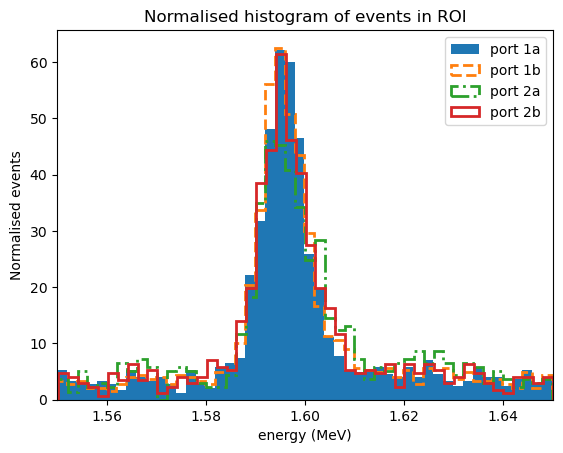

In [7]:
binn = 50
isa.plot_hist(port_1a, binning = binn, output = False, fill = True, label = 'port 1a', dens = True)
isa.plot_hist(port_1b, binning = binn, output = False, fill = False, label = 'port 1b', linestyle = 'dashed', dens = True)
isa.plot_hist(port_2a, binning = binn, output = False, fill = False, label = 'port 2a', linestyle = 'dashdot', dens = True)
isa.plot_hist(port_2b, binning = binn, output = False, fill = False, label = 'port 2b', dens = True)
plt.xlim([1.55, 1.65])
plt.ylabel('Normalised events')
plt.title('Normalised histogram of events in ROI')
plt.legend()


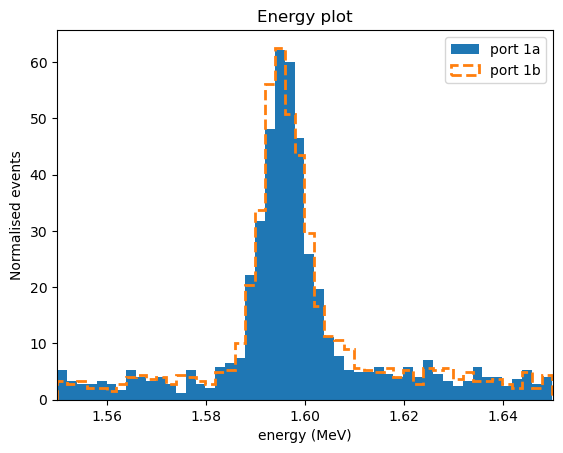

In [11]:
isa.plot_hist(port_1a, binning = binn, output = False, label = 'port 1a', dens = True)
isa.plot_hist(port_1b, binning = binn, output = False, fill = False, label = 'port 1b', linestyle = 'dashed', dens = True)
plt.ylabel('Normalised events')
plt.xlim([1.55, 1.65])
plt.legend()


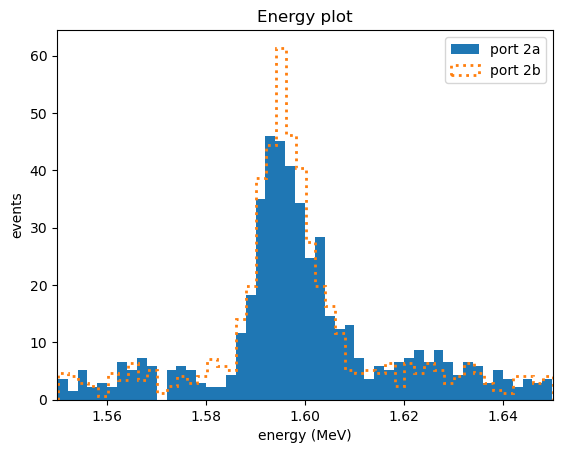

In [12]:
isa.plot_hist(port_2a, binning = binn, output = False, label = 'port 2a', linestyle = 'dashdot', dens = True)
isa.plot_hist(port_2b, binning = binn, output = False, fill = False, label = 'port 2b', linestyle = 'dotted', dens = True)
plt.xlim([1.55, 1.65])
plt.legend()

Text(0, 0.5, 'Normalised Events')

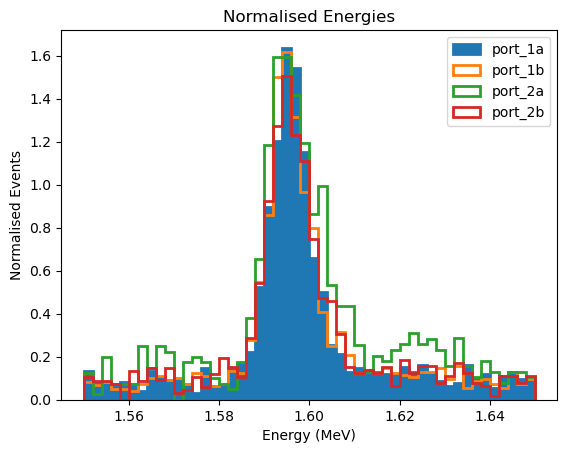

In [15]:
# Scuffed normalisation
list_titles = ['port_1a', 'port_1b', 'port_2a', 'port_2b']

port_Es = []

fill_style = [True, False, False, False]



port_Es.append(port_1a['energy'].to_numpy())
port_Es.append(port_1b['energy'].to_numpy())
port_Es.append(port_2a['energy'].to_numpy())
port_Es.append(port_2b['energy'].to_numpy())

for i in range(len(list_titles)):
    hist, bin_edges = np.histogram(port_Es[i], bins = binn)

    # collect weights
    weights = port_Es[i]/np.max(hist)

    # plot with weighting
    plt.hist(port_Es[i], bins = binn, label = list_titles[i], range = (1.55, 1.65), weights = weights, fill = fill_style[i], histtype = 'step', linewidth = 2)

plt.legend()
plt.title("Normalised Energies")
plt.xlabel('Energy (MeV)')
plt.ylabel("Normalised Events")

#### NOTE
this is normalised to the height of the main peak, not anything else

In [ ]:
plt.hist(port_1b_E, bins = binn, label = 'port 1b', range = (1.35, 1.9), weights = weights_1b, linestyle = 'dashed', fill = False, histtype = 'step', linewidth = 2)
plt.hist(port_2a_E, bins = binn, label = 'port 2a', range = (1.35, 1.9), weights = weights_2a, linestyle = 'dotted', fill = False, histtype = 'step', linewidth = 2)
plt.hist(port_2b_E, bins = binn, label = 'port 2b', range = (1.35, 1.9), weights = weights_2b, linestyle = 'dashdot', fill = False, histtype = 'step', linewidth = 2)